In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error # RMSLE Method (Excepting for Only Root)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<AxesSubplot:>

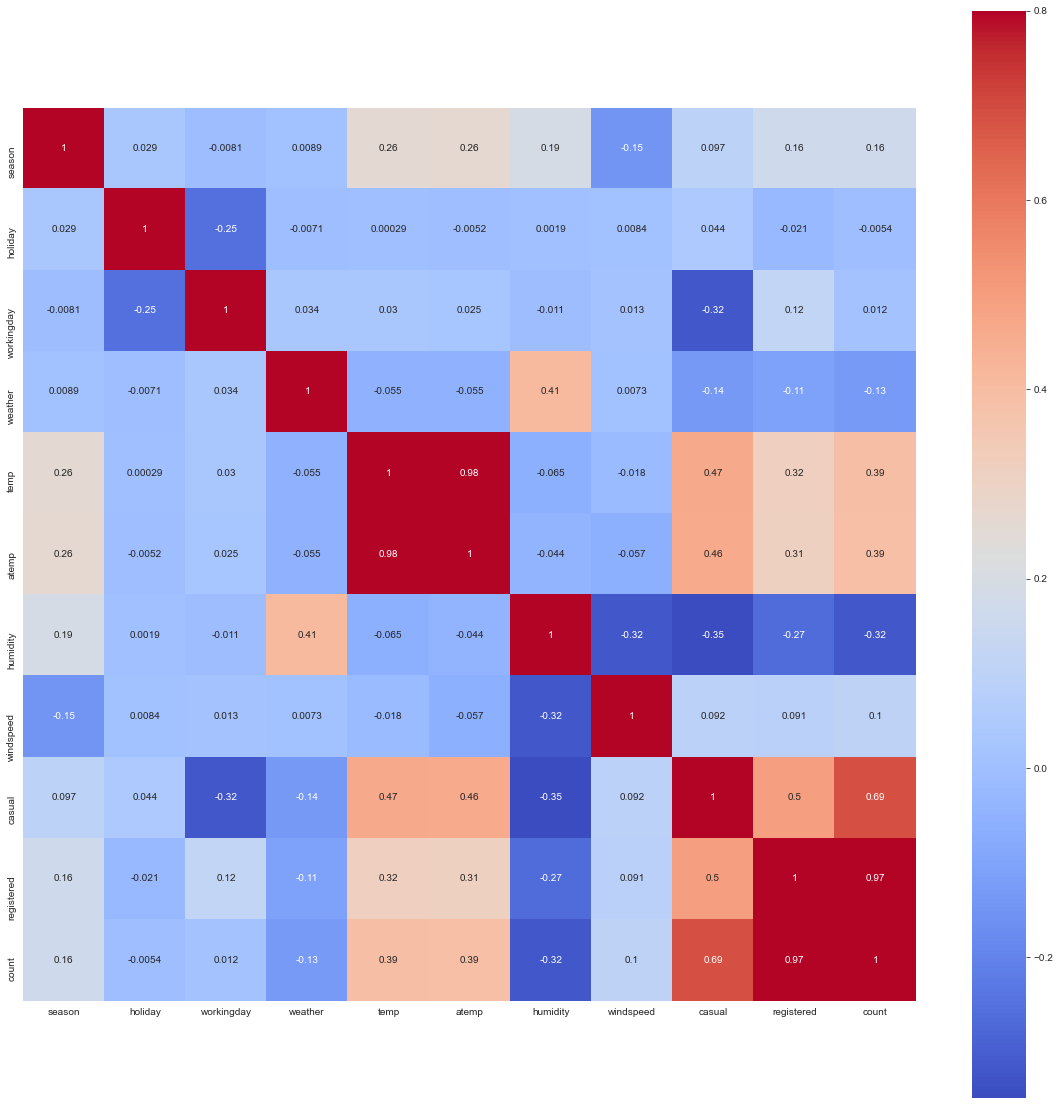

In [3]:
cols = list(train.columns)
corr = train[cols].corr()
mask = np.array(corr)

plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=0.8, square=True, annot=True, cmap="coolwarm")

In [4]:
type(train["datetime"].iloc[0])

str

In [5]:
train["datetime"] = pd.to_datetime(train["datetime"])
type(train["datetime"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
test["datetime"] = pd.to_datetime(test["datetime"])
type(test["datetime"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
train["year"] = train['datetime'].dt.year
train["month"] = train['datetime'].dt.month
train["day"] = train['datetime'].dt.day
train["hour"] = train['datetime'].dt.hour
train["minute"] = train['datetime'].dt.minute
train["second"] = train['datetime'].dt.second

cols = ['datetime', 'year', 'month', 'day', 'hour', 'minute', 'second']

train[cols].head(3)

,datetime,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0


In [8]:
test["year"] = test['datetime'].dt.year
test["month"] = test['datetime'].dt.month
test["day"] = test['datetime'].dt.day
test["hour"] = test['datetime'].dt.hour
test["minute"] = test['datetime'].dt.minute
test["second"] = test['datetime'].dt.second

cols = ['datetime', 'year', 'month', 'day', 'hour', 'minute', 'second']

test[cols].head(3)

,datetime,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

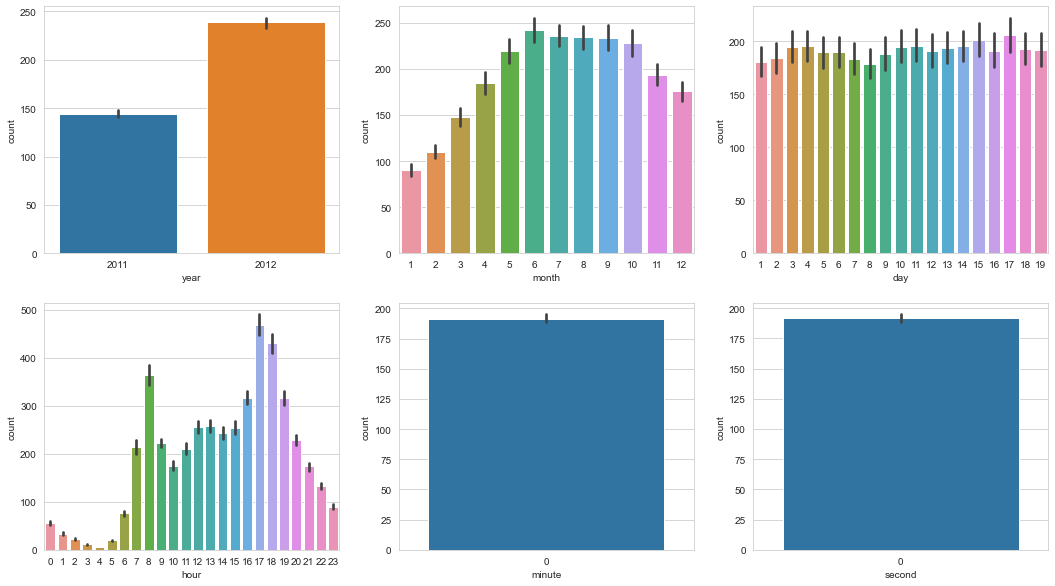

In [9]:
figure, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,10)

sns.barplot(data = train, x = "year", y = 'count', ax=ax1)
sns.barplot(data = train, x = "month", y = 'count', ax=ax2)
sns.barplot(data = train, x = "day", y = 'count', ax=ax3)
sns.barplot(data = train, x = "hour", y = 'count', ax=ax4)
sns.barplot(data = train, x = "minute", y = 'count', ax=ax5)
sns.barplot(data = train, x = "second", y = 'count', ax=ax6)

456


<AxesSubplot:xlabel='year_month', ylabel='count'>

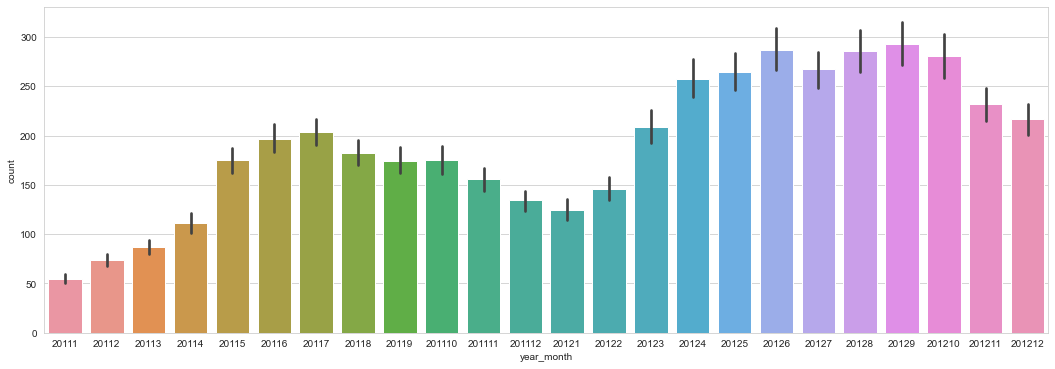

In [10]:
train["year_month"] = train["year"].astype("str") + train["month"].astype("str")

print(train["year_month"].value_counts()[0])

plt.figure(figsize=(18,6))
sns.barplot(data=train, x="year_month", y="count")

In [11]:
train["year_season"] = train["year"].astype("str") + train["season"].astype("str")
train[["year", "season", "year_season"]].head()

,year,season,year_season
0,2011,1,20111
1,2011,1,20111
2,2011,1,20111
3,2011,1,20111
4,2011,1,20111


<AxesSubplot:xlabel='year_season', ylabel='count'>

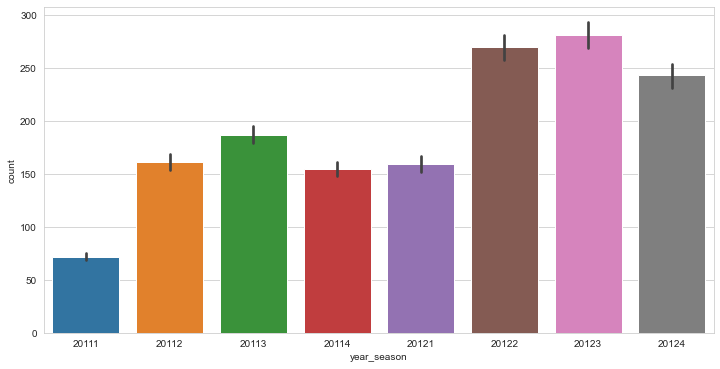

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data = train, x = "year_season", y = 'count')

In [13]:
dummies = pd.get_dummies(train['year_season'], prefix='year_season')
dummies
train = pd.concat([train, dummies], axis=1)

In [14]:
cols = ['year_season', 'year_season_20111', 'year_season_20112', 'year_season_20113',
       'year_season_20114', 'year_season_20121', 'year_season_20122',
       'year_season_20123', 'year_season_20124']
train[cols].head()

,year_season,year_season_20111,year_season_20112,year_season_20113,year_season_20114,year_season_20121,year_season_20122,year_season_20123,year_season_20124
0,20111,1,0,0,0,0,0,0,0
1,20111,1,0,0,0,0,0,0,0
2,20111,1,0,0,0,0,0,0,0
3,20111,1,0,0,0,0,0,0,0
4,20111,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='year_month', ylabel='count'>

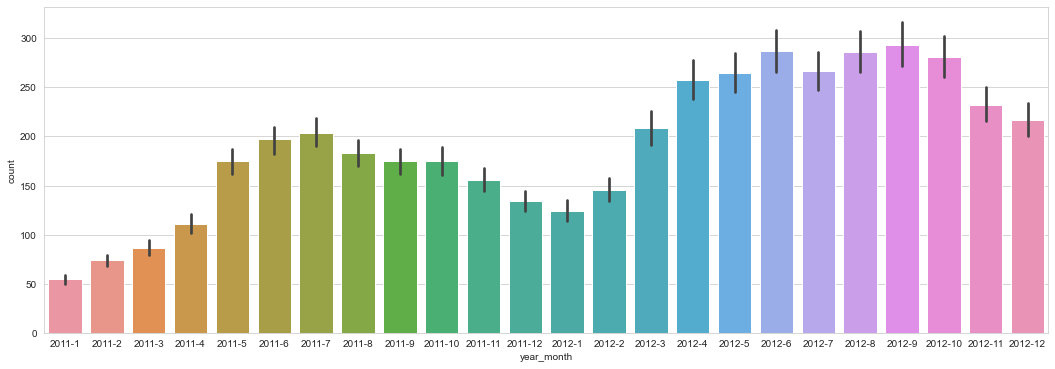

In [15]:
train["year_month"] = train["year"].astype("str") + "-" + train["month"].astype("str")
plt.figure(figsize = (18, 6))
sns.barplot(data = train, x = "year_month", y = "count")

#### 2) weather

<AxesSubplot:xlabel='weather', ylabel='count'>

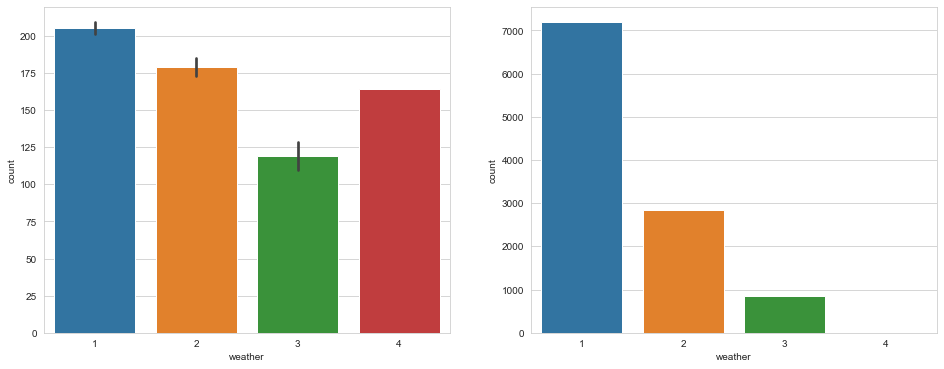

In [16]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(16,6)

sns.barplot(data=train, x='weather', y='count', ax=ax1)
sns.countplot(data=train, x='weather', ax=ax2)

In [17]:
train["weather_encoded"] = train["weather"].copy()
train.loc[train["weather"] == 4,"weather_encoded"] = 3

train.loc[train["weather"] == 4, ["weather", "weather_encoded"]]

,weather,weather_encoded
5631,4,3


#### 3) windspeed

C:\Users\rhqdn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='count'>

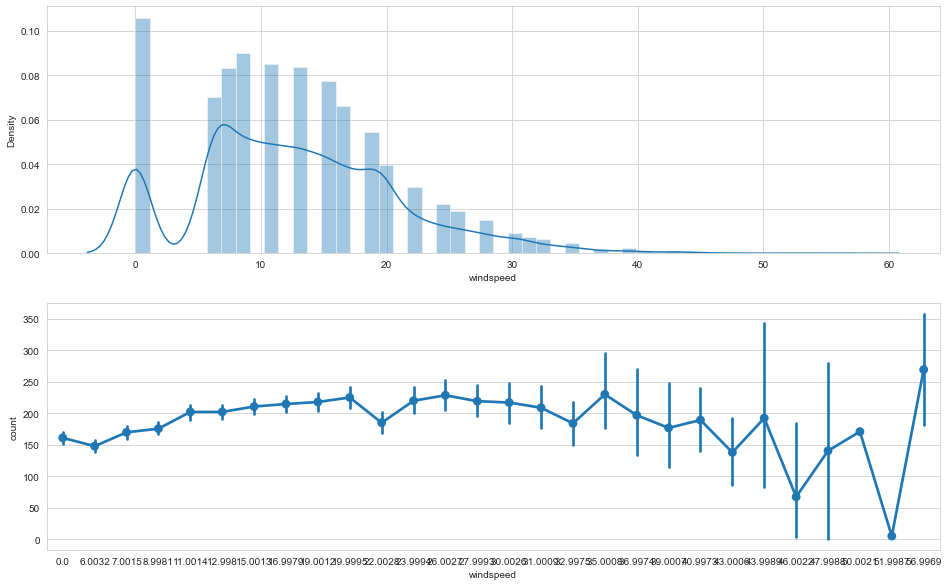

In [18]:
figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1)

figure.set_size_inches(16,10)

sns.distplot(train["windspeed"], ax=ax1)
sns.pointplot(data = train, x="windspeed", y="count", ax=ax2)

C:\Users\rhqdn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed_point', ylabel='Density'>

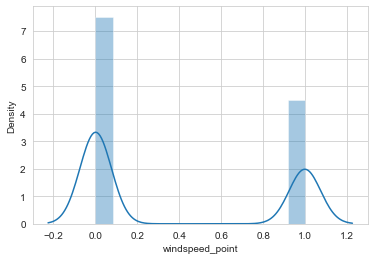

In [19]:
train["windspeed_int"] = train['windspeed'].astype('int')
train["windspeed_point"] = train["windspeed"] - train["windspeed_int"]

sns.distplot(train['windspeed_point'])

In [20]:
# dataframe, windspeed ==0
windspeed_0 = train[train["windspeed"] == 0]
# dataframe, windspeed !=0
windspeed_not0 = train[train["windspeed"] != 0]

windspeed_0_train = windspeed_0.drop(['datetime', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'year_month',
       'year_season', 'weather_encoded', 'windspeed_point', 'windspeed_int'], axis=1)

windspeed_not0_train = windspeed_not0.drop(['datetime', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'year_month',
       'year_season', 'weather_encoded', 'windspeed_point', 'windspeed_int'], axis=1)

windspeed_not0_label = windspeed_not0["windspeed"]

model_windspeed = RandomForestRegressor()
model_windspeed.fit(windspeed_not0_train, windspeed_not0_label)
windspeed_0_prediction = model_windspeed.predict(windspeed_0_train)
windspeed_0["windspeed"] = windspeed_0_prediction
windspeed_df = pd.concat([windspeed_0, windspeed_not0], axis=0)
windspeed_df["windspeed"].head()

<ipython-input-20-197fb2ff38ec>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_0["windspeed"] = windspeed_0_prediction


0    12.571543
1    15.311584
2    15.311584
3     7.395858
4     7.395858
Name: windspeed, dtype: float64

In [21]:
train["windspeed_encoded"] = windspeed_df["windspeed"]
train.loc[train["windspeed"] == 0, ["windspeed", "windspeed_encoded"]].head()

,windspeed,windspeed_encoded
0,0.0,12.571543
1,0.0,15.311584
2,0.0,15.311584
3,0.0,7.395858
4,0.0,7.395858


6.0032


C:\Users\rhqdn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed_encoded', ylabel='Density'>

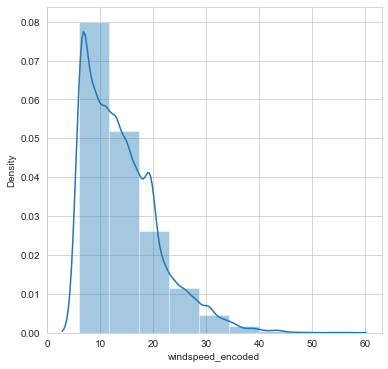

In [22]:
plt.figure(figsize=(6,6))
print(train["windspeed_encoded"].min())
sns.distplot(train['windspeed_encoded'],bins=np.linspace(train['windspeed_encoded'].min(),train['windspeed_encoded'].max(),10))

<AxesSubplot:>

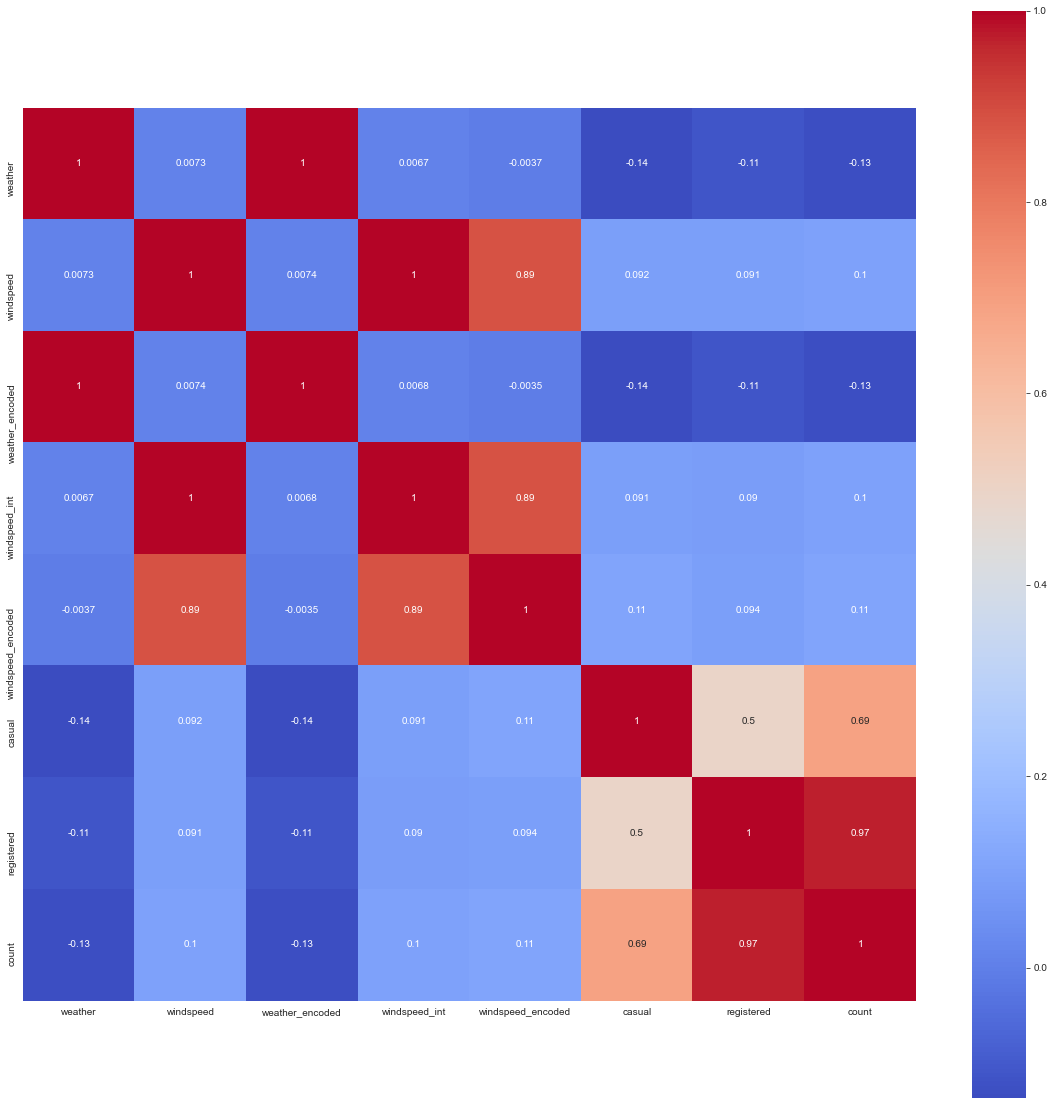

In [23]:
cols = ['weather', 'windspeed', 'weather_encoded', 'windspeed_int', 'windspeed_encoded',
       'casual', 'registered', 'count']
corr = train[cols].corr()
mask = np.array(corr)

plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap="coolwarm")

#### 4) temp

<AxesSubplot:xlabel='temp_int', ylabel='atemp_int'>

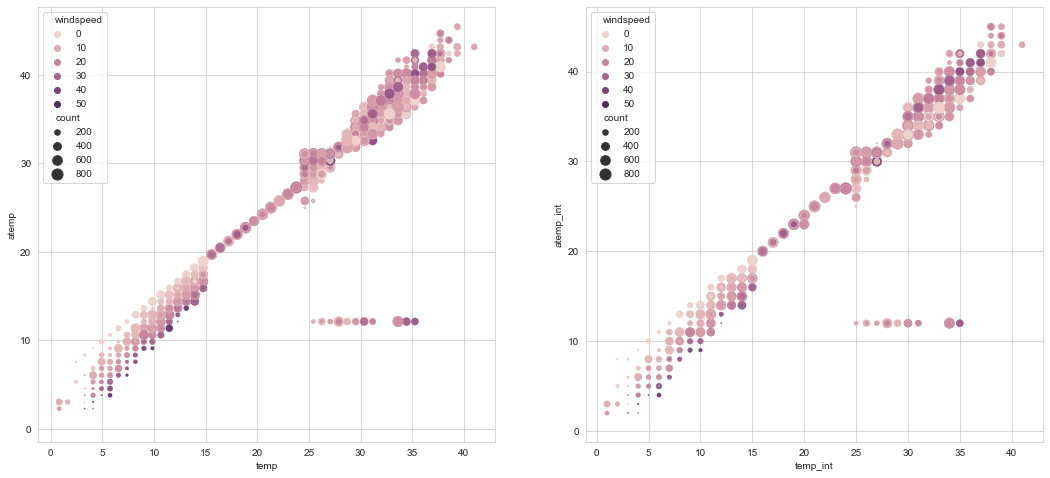

In [24]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

train["temp_int"] = train['temp'].round()
train["atemp_int"] = train['atemp'].round()

sns.scatterplot(data=train, x="temp", y="atemp", hue="windspeed", size="count", sizes=(0, 150), ax=ax1)
sns.scatterplot(data=train, x="temp_int", y="atemp_int", hue="windspeed", size="count", sizes=(0, 150), ax=ax2)

In [25]:
function = np.polyfit(train["temp_int"], train["atemp_int"], 1)
function[:]

array([1.07142963, 1.99659939])

In [26]:
train["temp_atemp"] = train['temp_int'] - train['atemp_int']
cols = ["temp_int", "atemp_int", "temp_atemp"]

train[cols].head()

,temp_int,atemp_int,temp_atemp
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0


In [27]:
train["temp_atemp"].value_counts()

-4.0     5106
-3.0     2097
-2.0     1415
-5.0     1049
-1.0      509
-6.0      405
 0.0      219
 1.0       32
-7.0       21
 22.0       5
-8.0        5
 14.0       5
 2.0        4
 16.0       3
 15.0       3
 18.0       3
 23.0       2
 17.0       1
 13.0       1
 19.0       1
Name: temp_atemp, dtype: int64

<AxesSubplot:xlabel='temp_final', ylabel='count'>

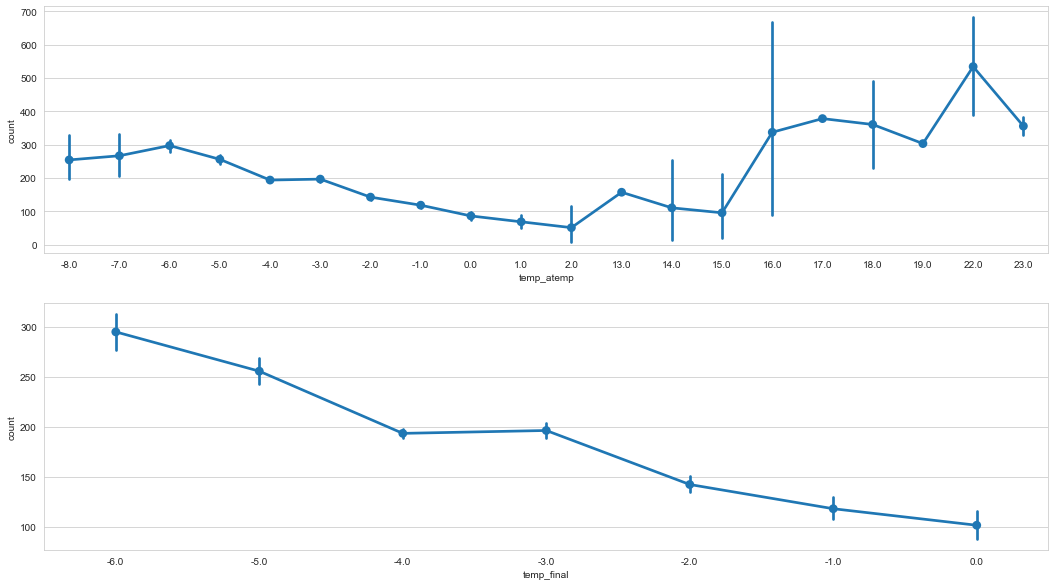

In [28]:
train["temp_final"] = train["temp_atemp"].copy()
train.loc[train['temp_atemp'] > 0, "temp_final"] = 0
train.loc[train["temp_atemp"] < -6, "temp_final"] = -6

figure, ((ax1,ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,10)

sns.pointplot(data=train, x="temp_atemp", y="count", ax=ax1)
sns.pointplot(data=train, x="temp_final", y="count", ax=ax2)

In [29]:
c1 = train['atemp'] < 20
c2 = train['temp'] > 20

train['atemp_encoded'] = train['atemp'].copy()
train.loc[c1 & c2, 'atemp_encoded'] = train['temp'] + 2
train.loc[c1 & c2, ['temp','atemp', 'atemp_encoded']].head()

,temp,atemp,atemp_encoded
8991,27.88,12.12,29.88
8992,27.06,12.12,29.06
8993,27.06,12.12,29.06
8994,26.24,12.12,28.24
8995,26.24,12.12,28.24


<AxesSubplot:xlabel='temp', ylabel='atemp_encoded'>

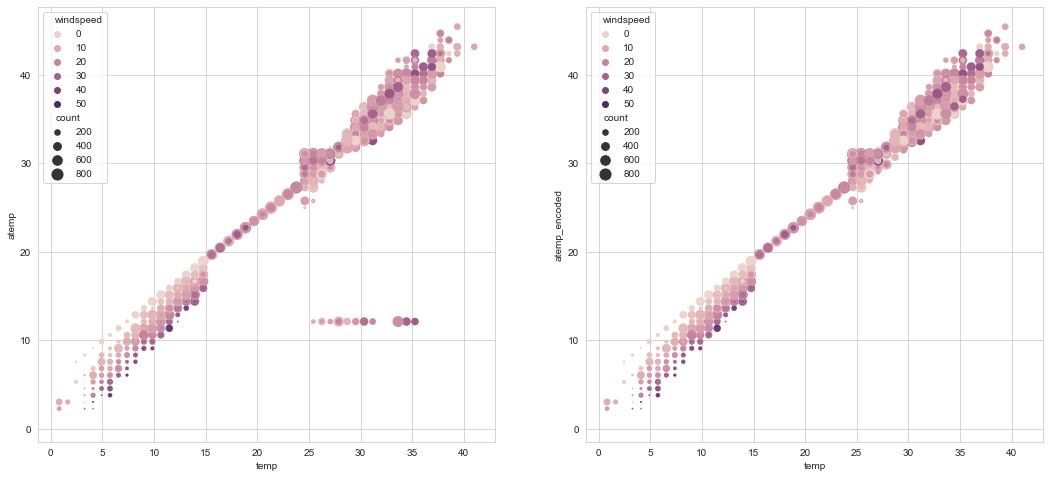

In [30]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

sns.scatterplot(data=train, x="temp", y="atemp", hue="windspeed", size="count", sizes=(0, 150), ax=ax1)
sns.scatterplot(data=train, x="temp", y="atemp_encoded", hue="windspeed", size="count", sizes=(0, 150), ax=ax2)

#### 5) datetime-dayofweek

이번에 분석할 데이터는 요일을 나타내는 데이터, 일명 ```datetime-dayofweek```입니다. 이 데이터는 현재 feature로 가지고 있지만, 날짜와 시간을 나타내는 ```datetime``` 컬럼에서 추출할 수 있습니다. (ex: ```train["datetime"].dt.day_name()```) 앞서 분석과 마찬가지로, 날짜 컬럼도 탐험적 데이터 분석을 통해 분석해보겠습니다.

In [31]:
train["weekday"] = train["datetime"].dt.day_name()
train["weekday_int"] = train["datetime"].dt.dayofweek
test["weekday"] = test["datetime"].dt.day_name()
test["weekday_int"] = test["datetime"].dt.dayofweek

In [32]:
train[["weekday", "weekday_int"]].head(2)

,weekday,weekday_int
0,Saturday,5
1,Saturday,5


In [33]:
train["weekday"].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

<AxesSubplot:xlabel='hour', ylabel='count'>

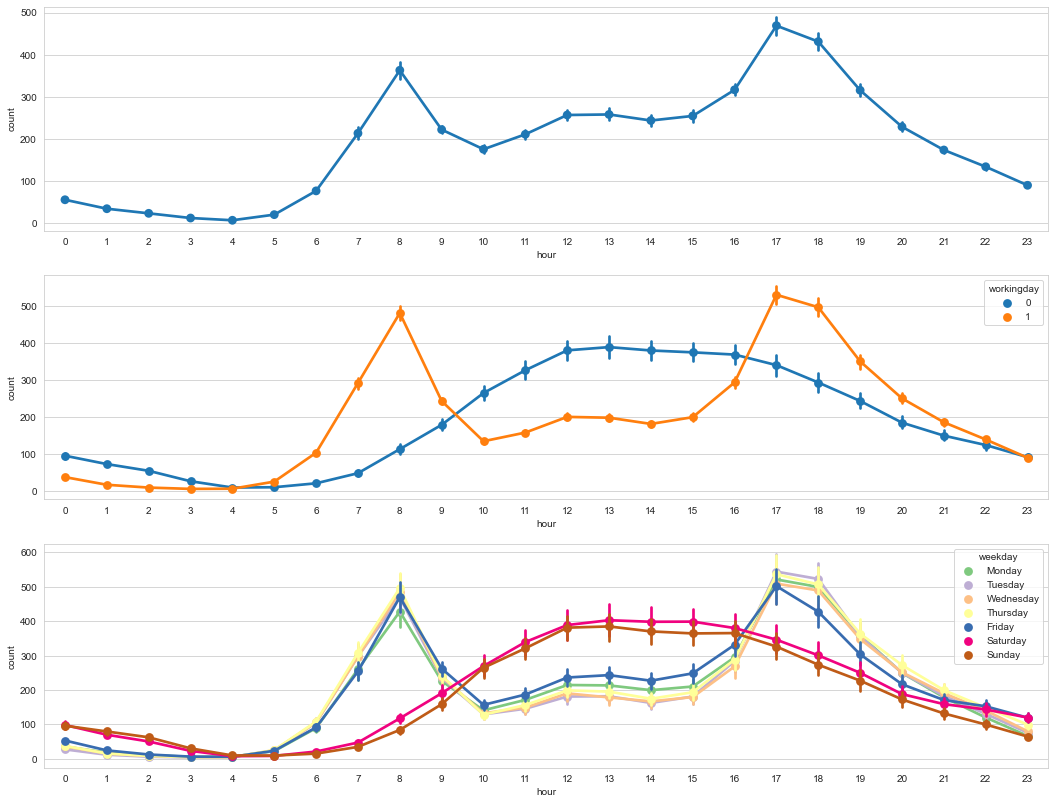

In [34]:
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,14)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']

sns.pointplot(data=train, x="hour", y="count", ax=ax1)
sns.pointplot(data=train, x="hour", y="count", ax=ax2, hue="workingday")
sns.pointplot(data=train, x="hour", y="count", ax=ax3, hue="weekday", hue_order=weekday_order, palette='Accent')

In [35]:
train["weekend"] = 0

c1 = train['holiday'] == 0
c2 = train['workingday'] == 0

train.loc[c1 & c2, "weekend"] = 1
train[["holiday", 'workingday', "weekend"]].head()

,holiday,workingday,weekend
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


<AxesSubplot:xlabel='hour', ylabel='count'>

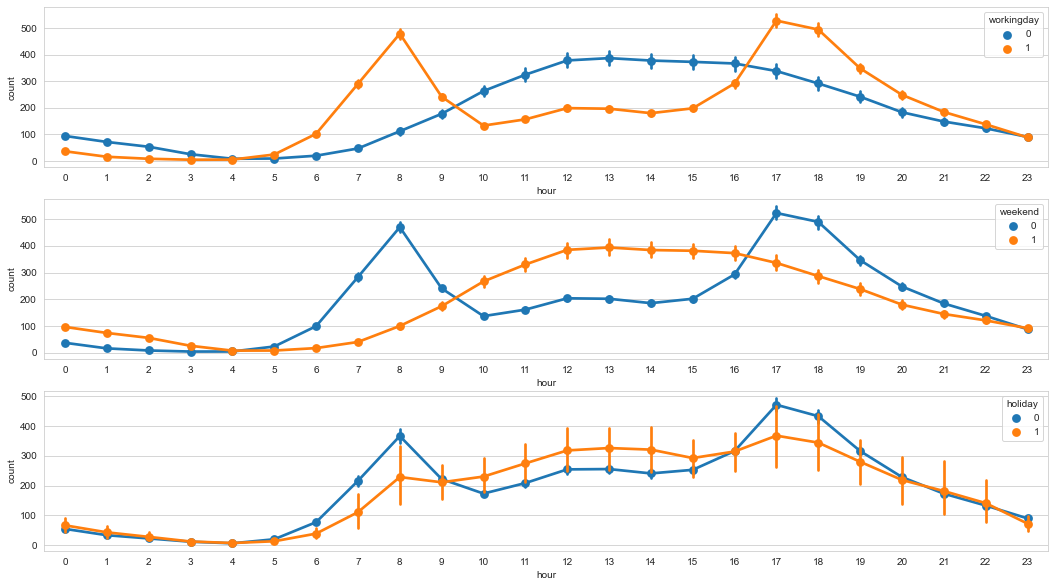

In [36]:
figure, (ax1,ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,10)

# weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="hour", y="count", hue="weekend", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue="holiday", ax=ax3)

<AxesSubplot:xlabel='hour', ylabel='registered'>

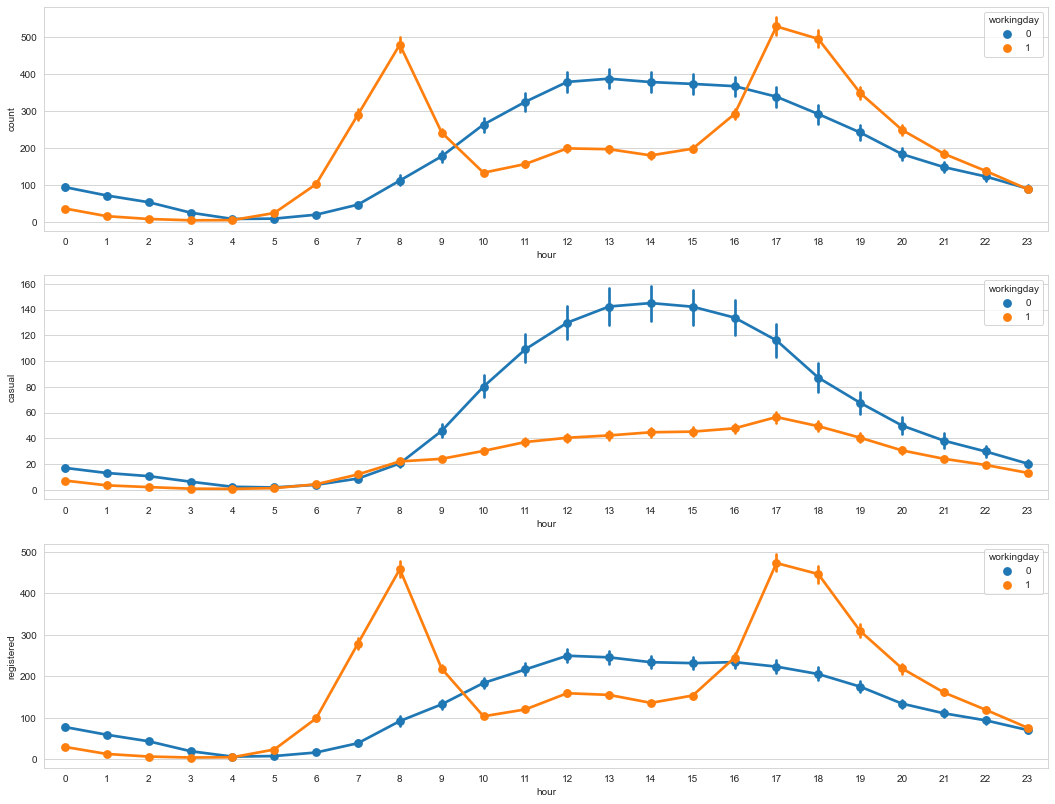

In [37]:
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,14)

sns.pointplot(data=train, x="hour", y="count", ax=ax1, hue="workingday")
sns.pointplot(data=train, x="hour", y="casual", ax=ax2, hue="workingday")
sns.pointplot(data=train, x="hour", y="registered", ax=ax3, hue="workingday")

<AxesSubplot:xlabel='hour', ylabel='registered'>

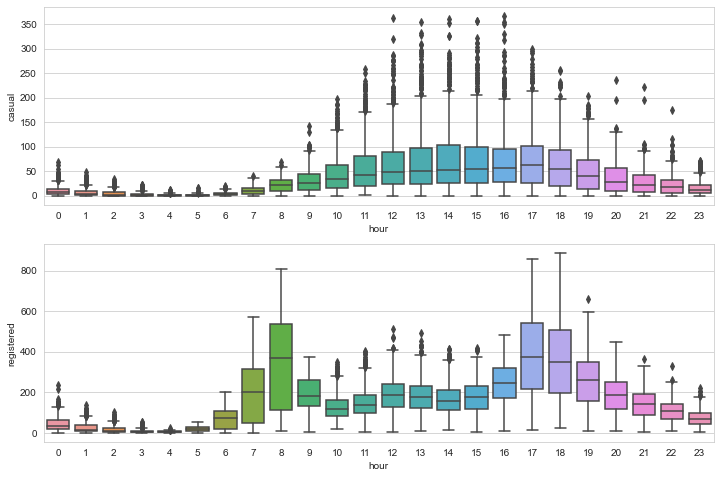

In [38]:
figure, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(12,8)

sns.boxplot(x='hour', y='casual', data=train, ax=ax1)
sns.boxplot(x='hour', y='registered', data=train, ax=ax2)

## Train

C:\Users\rhqdn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhqdn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhqdn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='count', ylabel='Density'>

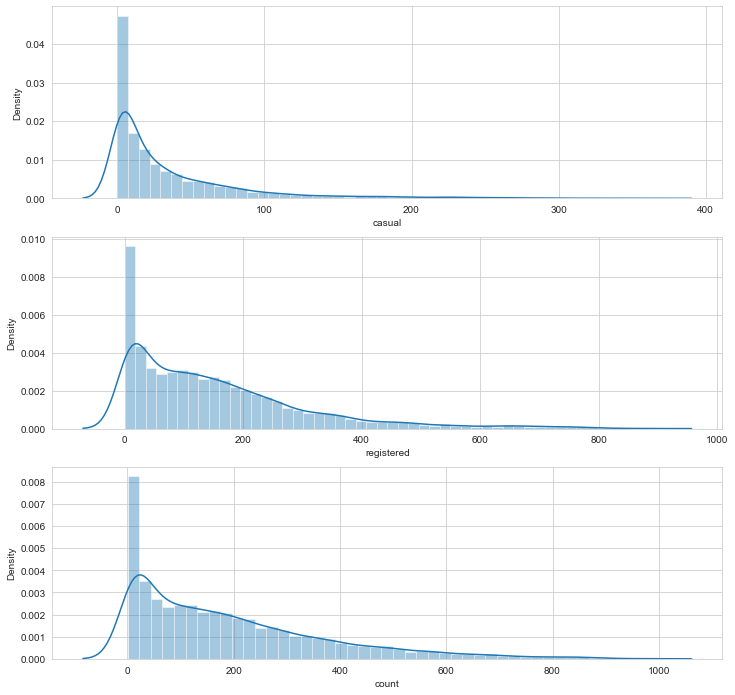

In [39]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(12,12)

sns.distplot(train["casual"], ax=ax1)
sns.distplot(train["registered"], ax=ax2)
sns.distplot(train["count"], ax=ax3)

In [40]:
y_train_casual = train["casual"]
y_train_registered = train["registered"]
y_train_count = train["count"]

y_train_casual_log = np.log(y_train_casual + 1)
y_train_registered_log = np.log(y_train_registered + 1)
y_train_count_log = np.log(y_train_count + 1)

C:\Users\rhqdn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhqdn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhqdn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='count', ylabel='Density'>

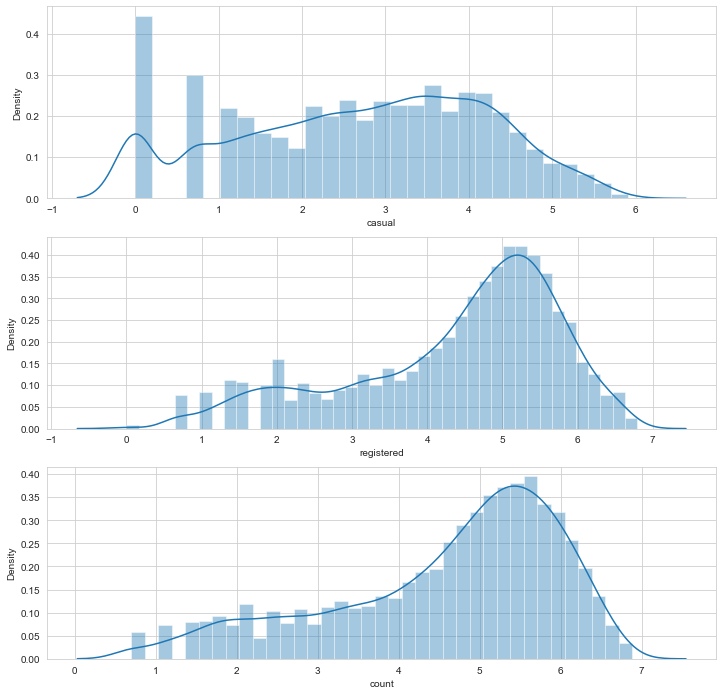

In [41]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(12,12)

sns.distplot(y_train_casual_log, ax=ax1)
sns.distplot(y_train_registered_log, ax=ax2)
sns.distplot(y_train_count_log, ax=ax3)

### Selection feature for optimizing ML perfomance (Statistical Hypothesis Test)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=37,
                             n_estimators=10)

model

RandomForestRegressor(n_estimators=10, random_state=37)

In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

feature_dict = {# Original
                "feature1" : ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 
                              'humidity', 'windspeed', 'year', 'hour', 'weekday_int'],

                # + windspeed_encoded, year_season (One Hot Encoding) 
                # - year, season
                "feature2" : ['holiday', 'workingday', 'weather', 'temp', 'atemp', 
                              'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 'year_season_20111', 
                              'year_season_20112','year_season_20113', 'year_season_20114', 'year_season_20121',
                              'year_season_20122', 'year_season_20123', 'year_season_20124'],
                
                # + windspeed_encoded, year_season (One Hot Encoding) 
                # - year, season
                # temp, atemp → temp, atemp_encoded    
                "feature3" : ['holiday', 'workingday', 'weather', 'temp', 'atemp_encoded', 
                              'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 'year_season_20111', 
                              'year_season_20112','year_season_20113', 'year_season_20114', 'year_season_20121',
                              'year_season_20122', 'year_season_20123', 'year_season_20124'],
    
                # + windspeed_encoded, year_season (One Hot Encoding) 
                # - year, season
                # temp, atemp → atemp
                "feature4" : ['holiday', 'workingday', 'weather', 'atemp', 
                              'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 'year_season_20111', 
                              'year_season_20112','year_season_20113', 'year_season_20114', 'year_season_20121',
                              'year_season_20122', 'year_season_20123', 'year_season_20124'],
    
                # + windspeed_encoded, year_season (One Hot Encoding) 
                # - year, season
                #  temp, atemp → atemp
                # 'holiday', 'workingday', 'weekend' (One Hot Encoding)
                "feature5" : ['holiday', 'workingday', 'weather', 'atemp', 
                              'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 'year_season_20111', 
                              'year_season_20112','year_season_20113', 'year_season_20114', 'year_season_20121',
                              'year_season_20122', 'year_season_20123', 'year_season_20124', 'weekend'],
    
                # + windspeed_encoded, year_season (One Hot Encoding) 
                # - year, season
                # temp, atemp → atemp_encoded
                # 'holiday', 'workingday', 'weekend' (One Hot Encoding)    
                "feature6" : ['holiday', 'workingday', 'weather', 'atemp_encoded', 
                              'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 'year_season_20111', 
                              'year_season_20112','year_season_20113', 'year_season_20114', 'year_season_20121',
                              'year_season_20122', 'year_season_20123', 'year_season_20124', 'weekend'],
                # + windspeed_encoded, year_season (One Hot Encoding) 
                # - year, season
                # temp, atemp → temp
                # 'holiday', 'workingday', 'weekend' (One Hot Encoding)    
                 "feature7" : ['holiday', 'workingday', 'weather', 'temp', 
                              'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 'year_season_20111', 
                              'year_season_20112','year_season_20113', 'year_season_20114', 'year_season_20121',
                              'year_season_20122', 'year_season_20123', 'year_season_20124', 'weekend']
}

features = list(feature_dict.values())

result = []

for feature in features:
    x_train = train[feature]
    
    # Cross Validation
      # Log Transform
    y_predict_casual_log = cross_val_predict(model, x_train, y_train_casual_log, cv = 20)
    y_predict_registered_log = cross_val_predict(model, x_train, y_train_registered_log, cv = 20)
    y_predict_count_log = cross_val_predict(model, x_train, y_train_count_log, cv = 20)
      # Exponential Transform
    y_predict_casual = np.exp(y_predict_casual_log) - 1
    y_predict_registered = np.exp(y_predict_registered_log) - 1
    y_predict_count = np.exp(y_predict_registered_log) - 1
      # Geometric mean (y_predict : Final Results)
    y_predict = np.sqrt((y_predict_casual+y_predict_registered)*y_predict_count)
    
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    feature_num = features.index(feature) + 1
    
    result_dic = {
        'feature' : feature,
        'score' : score,
        'feature_num' : feature_num
    }
    
    result.append(result_dic)
    
    print(f"feature {feature_num} \nfeature_list : {feature} \n =====> score = {score:.5f} \n")

feature 1 
feature_list : ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'hour', 'weekday_int'] 
 =====> score = 0.38769 

feature 2 
feature_list : ['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 'year_season_20111', 'year_season_20112', 'year_season_20113', 'year_season_20114', 'year_season_20121', 'year_season_20122', 'year_season_20123', 'year_season_20124'] 
 =====> score = 0.38364 

feature 3 
feature_list : ['holiday', 'workingday', 'weather', 'temp', 'atemp_encoded', 'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 'year_season_20111', 'year_season_20112', 'year_season_20113', 'year_season_20114', 'year_season_20121', 'year_season_20122', 'year_season_20123', 'year_season_20124'] 
 =====> score = 0.38273 

feature 4 
feature_list : ['holiday', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 'year_season_20111', 'year_se

### Feature Engineering for test.csv

In [44]:
feature = ['holiday', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed_encoded', 'hour', 'weekday_int', 
           'year_season_20111', 'year_season_20112','year_season_20113', 'year_season_20114', 'year_season_20121', 
           'year_season_20122', 'year_season_20123', 'year_season_20124', 'weekend']

#### windspeed_encoded

In [45]:
# dataframe, windspeed ==0
windspeed_0 = test[test["windspeed"] == 0]
# dataframe, windspeed !=0
windspeed_not0 = test[test["windspeed"] != 0]

windspeed_0_test = windspeed_0.drop(['datetime', 'windspeed', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'weekday', 'weekday_int'], axis=1)

windspeed_not0_test = windspeed_not0.drop(['datetime', 'windspeed', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'weekday', 'weekday_int'], axis=1)

windspeed_not0_label = windspeed_not0["windspeed"]

model_windspeed = RandomForestRegressor()
model_windspeed.fit(windspeed_not0_test, windspeed_not0_label)
windspeed_0_prediction = model_windspeed.predict(windspeed_0_test)
windspeed_0["windspeed"] = windspeed_0_prediction
windspeed_df = pd.concat([windspeed_0, windspeed_not0], axis=0)
windspeed_df["windspeed"].head()

<ipython-input-45-314ce6d80c30>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windspeed_0["windspeed"] = windspeed_0_prediction


1      8.851750
2      8.851750
12     6.993684
60     9.201890
62    17.125179
Name: windspeed, dtype: float64

In [46]:
test["windspeed_encoded"] = windspeed_df["windspeed"]
test.loc[test["windspeed"] == 0, ["windspeed", "windspeed_encoded"]].head()

,windspeed,windspeed_encoded
1,0.0,8.851750
2,0.0,8.851750
12,0.0,6.993684
60,0.0,9.201890
62,0.0,17.125179


#### year_season (One Hot Encoding)

In [47]:
test["year_season"] = test["year"].astype("str") + test["season"].astype("str")
test[["year", "season", "year_season"]].head()

,year,season,year_season
0,2011,1,20111
1,2011,1,20111
2,2011,1,20111
3,2011,1,20111
4,2011,1,20111


In [48]:
dummies = pd.get_dummies(test['year_season'], prefix='year_season')
dummies
test = pd.concat([test, dummies], axis=1)

In [49]:
cols = ['year_season', 'year_season_20111', 'year_season_20112', 'year_season_20113',
       'year_season_20114', 'year_season_20121', 'year_season_20122',
       'year_season_20123', 'year_season_20124']
test[cols].head()

,year_season,year_season_20111,year_season_20112,year_season_20113,year_season_20114,year_season_20121,year_season_20122,year_season_20123,year_season_20124
0,20111,1,0,0,0,0,0,0,0
1,20111,1,0,0,0,0,0,0,0
2,20111,1,0,0,0,0,0,0,0
3,20111,1,0,0,0,0,0,0,0
4,20111,1,0,0,0,0,0,0,0


#### weekend (One Hot Encoding) - "holiday", "workingday"

In [50]:
test["weekend"] = 0

c1 = test['holiday'] == 0
c2 = test['workingday'] == 0

test.loc[c1 & c2, "weekend"] = 1
test[["holiday", 'workingday', "weekend"]].head()

,holiday,workingday,weekend
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


### Random Forest
X_train, X_test, y_train 데이터를 만들었으면, 이제 이 데이터를 활용하여 머신러닝 알고리즘을 학습시켜 보겠습니다.

이번에 사용할 알고리즘은 랜덤 포레스트(Random Forest)입니다. 랜덤 포레스트는 의사결정나무(Decision Tree)의 업그레이드 버전이라고 볼 수 있는데, 대부분의 경우 의사결정나무보다 더 좋은 성능을 보장합니다. 알고리즘의 동작 원리는 다음과 같습니다.

먼저 전체 데이터가 아니라, 데이터의 일부분을 랜덤하게 가져옵니다. 이를 랜덤 샘플링, 또는 베깅(bootstrap aggregating)이라고 합니다. 이렇게 랜덤 샘플링한 데이터로 의사결정나무(Decision Tree)를 하나 만듭니다.
1번의 방식을 사용하면 이론적으로 무제한의 다양한 트리를 만들 수 있습니다. 이 트리를 지정한 갯수만큼 생성합니다.
생성한 트리끼리 투표를 합니다. 가령 타이타닉 승객 데이터를 제공했을 때, 1,000개의 트리 중 700개가 생존/300개가 사망했다고 하면 해당 승객은 생존했다고 가정합니다. 정 반대로 400개가 생존/600개가 사망했다고 하면 해당 승객은 사망했다고 가정합니다.
이러한 방식을 거치면 의사결정나무(Decision Tree)보다 더 강력한 알고리즘을 구현할 수 있습니다. (자세한 설명은 [다음의 링크](http://swalloow.tistory.com/92)를 참고 바랍니다)

그런 의미에서, 이번에도 파이썬의 머신러닝 패키지인 [scikit-learn](scikit-learn.org)에서 랜덤 포레스트([RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html))를 가져오겠습니다.

### Hyperparameter Tuning

랜덤 포레스트(Random Forest)를 사용하기로 마음 먹었으면, 이번에는 이 랜덤포레스트의 하이퍼패러미터를 튜닝해보겠습니다.

머신러닝 모델에는 다양한 옵션이 있으며, 이 옵션을 통해 모델의 성능을 끌어올릴 수 있습니다. 이 옵션들을 전문용어로 하이퍼패러미터(Hyperparameter)라고 부릅니다. 만일 적절한 하이퍼패러미터를 찾아서 모델에 적용할 수 있다면 모델의 성능을 한 층 더 끌어올릴 수 있습니다. 이를 **하이퍼패러미터 튜닝(Hyperparamter Tuning)**이라고 합니다.

어떻게 하면 가장 좋은 하이퍼패러미터를 찾을 수 있을까요? 답은 간단합니다. 이론상으로 존재 가능한 모든 하이퍼패러미터 범위에서 랜덤하게 찾아서 Cross Validation을 해보면 됩니다. 이 방식을 랜덤 서치(Random Search)라고 합니다.

<img src="http://cs231n.github.io/assets/nn3/gridsearchbad.jpeg" alt="Random Search for Hyper-Parameter Optimization" style="width: 360px;"/>

<p style="text-align: center;">
  <small>
    위 그림과 같이, Grid Search를 활용하면 가장 좋은 성능을 내는 하이퍼패러미터를 찾기 어렵습니다. 이런 경우는 Random Search를 사용합니다.
  </small>
</p>
<p style="text-align: center;">
  <small>
    (see <a href="http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf">Random Search for Hyper-Parameter Optimization</a>)
  </small>
</p>

하지만 랜덤 서치(Random Search)는 현실적으로 시간이 오래 걸리기 때문에, 랜덤 서치(Random Search)를 응용한 다른 하이퍼패러미터 튜닝 방식을 사용하겠습니다. 바로 **Coarse & Fine Search** 입니다.

Coarse & Fine Search는 크게 1) Coarse Search와 2) Fine Search로 동작합니다

먼저 **Coarse Search**에서는 Random Search를 하되, 이론상으로 존재 가능한 모든 하이퍼패러미터 범위를 집어넣습니다. 이렇게 Random Search를 하면 가장 좋은 하이퍼패러미터를 찾는 것은 어렵지만, **좋지 않은 하이퍼패러미터를 정렬해서 후순위로 놓을 수 있습니다.**

이를 통해 좋지 않은 하이퍼패러미터를 버린 뒤 다시 한 번 Random Search를 하는 것을 **Fine Search**라고 합니다.

#### Random Search(Coarse)

In [51]:
x_train = train[feature]
print(x_train.shape)
x_train.head()

(10886, 17)


,holiday,workingday,weather,atemp,humidity,windspeed_encoded,hour,weekday_int,year_season_20111,year_season_20112,year_season_20113,year_season_20114,year_season_20121,year_season_20122,year_season_20123,year_season_20124,weekend
0,0,0,1,14.395,81,12.571543,0,5,1,0,0,0,0,0,0,0,1
1,0,0,1,13.635,80,15.311584,1,5,1,0,0,0,0,0,0,0,1
2,0,0,1,13.635,80,15.311584,2,5,1,0,0,0,0,0,0,0,1
3,0,0,1,14.395,75,7.395858,3,5,1,0,0,0,0,0,0,0,1
4,0,0,1,14.395,75,7.395858,4,5,1,0,0,0,0,0,0,0,1


In [52]:
x_test = test[feature]
print(x_test.shape)
x_test.head()

(6493, 17)


,holiday,workingday,weather,atemp,humidity,windspeed_encoded,hour,weekday_int,year_season_20111,year_season_20112,year_season_20113,year_season_20114,year_season_20121,year_season_20122,year_season_20123,year_season_20124,weekend
0,0,1,1,11.365,56,26.00270,0,3,1,0,0,0,0,0,0,0,0
1,0,1,1,13.635,56,8.85175,1,3,1,0,0,0,0,0,0,0,0
2,0,1,1,13.635,56,8.85175,2,3,1,0,0,0,0,0,0,0,0
3,0,1,1,12.880,56,11.00140,3,3,1,0,0,0,0,0,0,0,0
4,0,1,1,12.880,56,11.00140,4,3,1,0,0,0,0,0,0,0,0


In [53]:
pd.concat([y_train_casual_log, y_train_registered_log, y_train_count_log], axis=1).head()

,casual,registered,count
0,1.386294,2.639057,2.833213
1,2.197225,3.496508,3.713572
2,1.791759,3.332205,3.496508
3,1.386294,2.397895,2.639057
4,0.000000,0.693147,0.693147


In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error # RMSLE Method (Excepting for Only Root)

n_estimators = 300
# Generally the more n_estimators, the better performance.. but it's too slow for finding hyperparameters
# So, n_estimators set 300 at first. And after fixing hyperparameters, set the n_estimators more higher such as 1000.
num_epoch = 100
# Randomly repeats 100 searches.
coarse_hyperparameters_list = []
# Save hyperparameter results as a list 

for epoch in range(num_epoch):
    max_depth = np.random.randint(low = 2, high = 100) # Extract integer number randomly from 2 to 100
    max_features = np.random.uniform(low = 0.1, high = 1.0) # Extract float number randomly from 0.1 to 1
    model = RandomForestRegressor(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 n_jobs = -1,
                                 random_state = 37)
    # Cross Validation
      # Log Transform
   
         # cv : Number of data to be split in Cross Vailidation
    y_predict_registered_log = cross_val_predict(model, x_train, y_train_registered_log, cv = 20)
    
      # Exponential Transform
    
    y_predict_registered = np.exp(y_predict_registered_log) - 1
    
      # Geometric mean (y_predict : Final Results)
    
    
    score = mean_squared_log_error(y_train_registered, y_predict_registered)
    score = np.sqrt(score)
    
    hyperparameters = {
        'epoch' : epoch,
        'score' : score,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'max_features' : max_features
    }
    coarse_hyperparameters_list.append(hyperparameters)
    
    print(f"{epoch:2} --- n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")
print(coarse_hyperparameters_list.shape)
coarse_hyperparameters_list.head(10)

 0 --- n_estimators = 300, max_depth = 67, max_features = 0.843048, Score = 0.34453
 1 --- n_estimators = 300, max_depth = 23, max_features = 0.472519, Score = 0.35204
 2 --- n_estimators = 300, max_depth = 36, max_features = 0.167405, Score = 0.52844
 3 --- n_estimators = 300, max_depth = 60, max_features = 0.577641, Score = 0.34760
 4 --- n_estimators = 300, max_depth = 53, max_features = 0.867289, Score = 0.34453
 5 --- n_estimators = 300, max_depth = 74, max_features = 0.615725, Score = 0.34478
 6 --- n_estimators = 300, max_depth = 65, max_features = 0.663032, Score = 0.34429
 7 --- n_estimators = 300, max_depth = 47, max_features = 0.683235, Score = 0.34429
 8 --- n_estimators = 300, max_depth = 51, max_features = 0.924013, Score = 0.34540
 9 --- n_estimators = 300, max_depth = 30, max_features = 0.302802, Score = 0.39186
10 --- n_estimators = 300, max_depth =  5, max_features = 0.293373, Score = 0.74278
11 --- n_estimators = 300, max_depth = 72, max_features = 0.820891, Score = 

98 --- n_estimators = 300, max_depth = 53, max_features = 0.449768, Score = 0.35867
99 --- n_estimators = 300, max_depth = 20, max_features = 0.501869, Score = 0.35107
(100, 5)


,epoch,score,n_estimators,max_depth,max_features
88,88,0.343863,300,81,0.746985
38,38,0.343863,300,92,0.714560
23,23,0.343863,300,62,0.717911
21,21,0.343863,300,88,0.746081
20,20,0.343863,300,79,0.745017
40,40,0.343963,300,89,0.807538
11,11,0.343963,300,72,0.820891
25,25,0.343963,300,88,0.767568
45,45,0.344286,300,54,0.678250
6,6,0.344286,300,65,0.663032


In [55]:
coarse_hyperparameters_list.to_csv("coarse_hyperparameters_result_registered.csv", index = False)

Set the **RandomForest** model

- n_estimators : Number of DecisionTree
- max_depth : 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
- max_features : Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
- n_jobs : 병렬 처리 여부. -1 대입하면 컴퓨터의 모든 코어(듀얼, 쿼드코어)를 활용
- random_state : 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 숫자 (공학용어인 Seed Number와 동일한 개념)

###  Random Search (Fine)

From Coarse Search, we can know that which hyperparameter's value make the ML performance more powerful below.

- max_depth = 40 ~ 70
- max_feature = 0.65 ~ 0.8

Now we use above code as it is, after modifying only peice of part.

```
max_depth = np.random.randint(low = 2, high = 100)
max_features = np.random.uniform(low = 0.7, high = 0.9)
```

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error # RMSLE Method (Excepting for Only Root)

n_estimators = 300
num_epoch = 100
fine_hyperparameters_list = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low = 40, high = 70) # Extract integer number randomly from 18 to 72
    max_features = np.random.uniform(low = 0.65, high = 0.8) # Extract float number randomly from 0.7 to 0.9
    model = RandomForestRegressor(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 n_jobs = -1,
                                 random_state = 37)
    # Cross Validation
      # Log Transform
    
    y_predict_registered_log = cross_val_predict(model, x_train, y_train_registered_log, cv = 20)
    
      # Exponential Transform
    
    y_predict_registered = np.exp(y_predict_registered_log) - 1
    
      # Geometric mean (y_predict : Final Results)
    
    
    score = mean_squared_log_error(y_train_registered, y_predict_registered)
    score = np.sqrt(score)
    
    hyperparameters = {
        'epoch' : epoch,
        'score' : score,
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'max_features' : max_features
    }
    fine_hyperparameters_list.append(hyperparameters)
    
    print(f"{epoch:2} --- n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

fine_hyperparameters_list = pd.DataFrame.from_dict(fine_hyperparameters_list)
fine_hyperparameters_list = fine_hyperparameters_list.sort_values(by = "score")

print(fine_hyperparameters_list.shape)
fine_hyperparameters_list.head(10)

 0 --- n_estimators = 300, max_depth = 45, max_features = 0.750156, Score = 0.34386
 1 --- n_estimators = 300, max_depth = 42, max_features = 0.758407, Score = 0.34386
 2 --- n_estimators = 300, max_depth = 51, max_features = 0.693154, Score = 0.34429
 3 --- n_estimators = 300, max_depth = 58, max_features = 0.739824, Score = 0.34386
 4 --- n_estimators = 300, max_depth = 41, max_features = 0.669791, Score = 0.34429
 5 --- n_estimators = 300, max_depth = 66, max_features = 0.768309, Score = 0.34396
 6 --- n_estimators = 300, max_depth = 61, max_features = 0.780659, Score = 0.34396
 7 --- n_estimators = 300, max_depth = 51, max_features = 0.741727, Score = 0.34386
 8 --- n_estimators = 300, max_depth = 48, max_features = 0.697529, Score = 0.34429
 9 --- n_estimators = 300, max_depth = 67, max_features = 0.700942, Score = 0.34429
10 --- n_estimators = 300, max_depth = 45, max_features = 0.661323, Score = 0.34429
11 --- n_estimators = 300, max_depth = 41, max_features = 0.672758, Score = 

98 --- n_estimators = 300, max_depth = 41, max_features = 0.730186, Score = 0.34386
99 --- n_estimators = 300, max_depth = 49, max_features = 0.719573, Score = 0.34386
(100, 5)


,epoch,score,n_estimators,max_depth,max_features
0,0,0.343863,300,45,0.750156
41,41,0.343863,300,63,0.755891
45,45,0.343863,300,63,0.710103
46,46,0.343863,300,67,0.712686
52,52,0.343863,300,45,0.715228
56,56,0.343863,300,52,0.716126
57,57,0.343863,300,54,0.730375
59,59,0.343863,300,52,0.754688
65,65,0.343863,300,61,0.711838
66,66,0.343863,300,43,0.716496


In [57]:
fine_hyperparameters_list.to_csv("fine_hyperparameters_result_registerd.csv", index = False)

In [58]:
fine_hyperparameters_file = pd.read_csv("fine_hyperparameters_result_registerd.csv")

fine_hyperparameters_file.head()

,epoch,score,n_estimators,max_depth,max_features
0,0,0.343863,300,45,0.750156
1,41,0.343863,300,63,0.755891
2,45,0.343863,300,63,0.710103
3,46,0.343863,300,67,0.712686
4,52,0.343863,300,45,0.715228


In [59]:
# set the best hyperparameter
best_hyperparameters = fine_hyperparameters_file.iloc[0]

best_max_depth = best_hyperparameters["max_depth"]
best_max_features = best_hyperparameters["max_features"]
best_max_score = best_hyperparameters["score"]

print(f"best score : {best_max_score:.5f}, best depth : {best_max_depth}, best features : {best_max_features:.6f}")

best score : 0.34386, best depth : 45.0, best features : 0.750156


### Predict

After tunning the HyperParameter, it's time to train the ML model.

scikit-learn에 있는 머신러닝 알고리즘에는 크게 두 가지 기능이 있습니다.

 * fit: 머신러닝 알고리즘을 학습시킵니다. 학습이라는 건 쉽게 말해 "머신러닝 알고리즘이 스스로 데이터에서 패턴을 찾는 행위"를 학습한다고 하며, 전문용어로 traning 내지는 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
 * predict: fit이 끝나면, 이후에 predict를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

In [60]:
# setting the n_estimators factor higher than Coarse, Fine Random Search
best_n_estimators = 1000

model = RandomForestRegressor(n_estimators = 1000, max_depth = best_max_depth, max_features = best_max_features,
                              random_state = 37, n_jobs = -1)
model

RandomForestRegressor(max_depth=45.0, max_features=0.7501557869453391,
                      n_estimators=1000, n_jobs=-1, random_state=37)

In [61]:

model.fit(x_train, y_train_registered_log)
registered_log_predictions = model.predict(x_test)


registered_predictions = np.exp(registered_log_predictions) - 1


print(registered_predictions.shape)
registered_predictions

(6493,)


array([ 10.40581135,   4.75059963,   1.46358828, ..., 102.6205094 ,
        93.43047173,  44.86430047])

###  Visualization

In [62]:
# import graphviz
# # scikit-learn(줄여서 sklearn)의 tree 모듈에서 Decision Tree를 시각화 할 수 있는 export_graphviz를 가져옵니다.
# from sklearn.datasets import load_iris
# iris = load_iris()

# # Model (can also use single decision tree)

# estimator = model.estimators_[500]

# dot_tree = export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = iris.feature_names,
#                 class_names = iris.target_names,
#                 rounded = True, 
#                 precision = 2, filled = True)
# # https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
# from IPython.display import Image
# Image(filename = 'tree.png')

### Submit

In [63]:
submission = pd.read_csv("baseline-script.csv")
print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0.931502
1,2011-01-20 01:00:00,0.770670
2,2011-01-20 02:00:00,0.911355
3,2011-01-20 03:00:00,0.634387
4,2011-01-20 04:00:00,0.453946


In [64]:
submission["count"] = submission["count"] + registered_predictions
print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.337314
1,2011-01-20 01:00:00,5.521269
2,2011-01-20 02:00:00,2.374943
3,2011-01-20 03:00:00,2.057600
4,2011-01-20 04:00:00,1.902692


In [65]:
submission.to_csv("baseline-script_final.csv", index = False)